# ***CAR PRICE PREDICTION***

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
# car data loading data set
ad = pd.read_csv(r"F:\DOWNLOADS\car ML\car_prediction_data.csv")

In [15]:
# Install first five rows
ad.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
ad.sample(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
71,corolla altis,2011,4.50,12.48,45000,Diesel,Dealer,Manual,0
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
42,sx4,2008,1.95,7.15,58000,Petrol,Dealer,Manual,0


In [17]:
ad.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [18]:
ad.shape

(301, 9)

In [19]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
ad.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
print(ad.Fuel_Type.value_counts())
print(ad.Seller_Type.value_counts())
print(ad.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [22]:
# Encodung datachecking categorical dataset
ad.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)
ad.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace= True)
ad.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace= True) 

C:\Users\dines\AppData\Local\Temp\ipykernel_16428\3972980403.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ad.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)
C:\Users\dines\AppData\Local\Temp\ipykernel_16428\3972980403.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ad.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace= True)
C:\Users\dines\AppData\Local\Temp\ipykernel_16428\3972980403.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [23]:
ad.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [24]:
# Splitting data tranning data set test data Target data set

x = ad.drop(['Car_Name','Selling_Price'],axis=1)
y = ad['Selling_Price']

In [25]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [26]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [27]:
# Splitting Trannig and Test Data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 2)

<h4><b>MODEL TRAINNING</b></h4>

In [28]:
# Linear Regression Model

lin_reg_model = LinearRegression()



In [29]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

<h4><b>MODEL EVOLUTION</b></h4>

In [30]:
# pradiction of trainning data

trainning_data_prediction = lin_reg_model.predict(x_train)

In [31]:
# R Square Errors

error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r Squred error :',error_score)

r Squred error : 0.8799451660493716


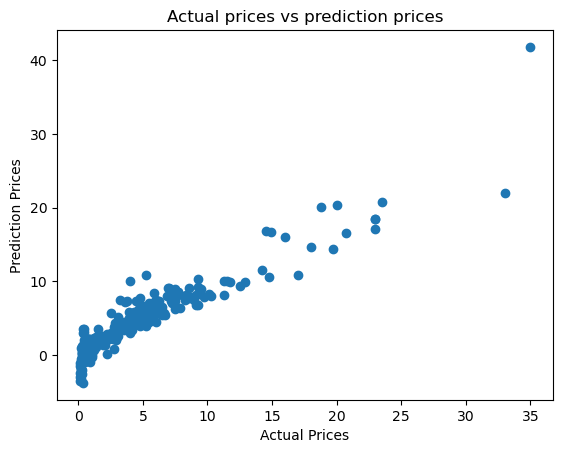

In [32]:
# Visulization the actual prices and prediction prices

plt.scatter(y_train,trainning_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.title('Actual prices vs prediction prices')
plt.show()

In [33]:
# Test data set prediction
test_data_prediction = lin_reg_model.predict(x_test)

In [34]:
# Test data score

error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.836576671502587


<function matplotlib.pyplot.show(close=None, block=None)>

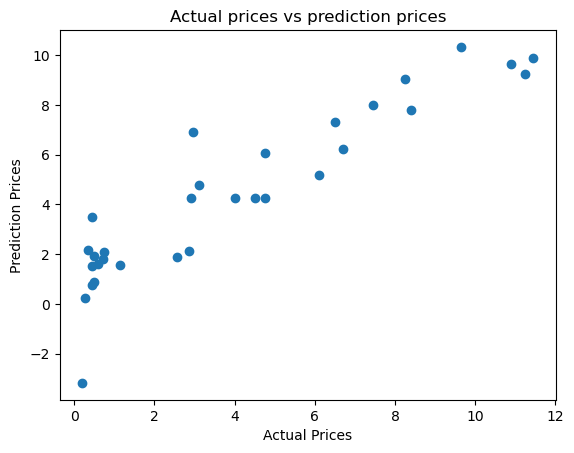

In [35]:
# Testing data prediction 
plt.scatter (y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.title('Actual prices vs prediction prices')
plt.show

In [36]:
# Testing Model

print(lin_reg_model .predict([[2018,8.00,15000,1,0,0,1]]))

[7.50377663]


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
print(lin_reg_model .predict([[2018,8.0,15000,1,0,1,1]]))

[9.01114011]


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print(lin_reg_model .predict([[2011,6.0,21000,1,0,2,1]]))

[6.73467699]


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
print(lin_reg_model .predict([[2005,3.6,70000,1,0,1,1]]))

[1.38798833]


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 